## <h1 style="text-align: center;">**Lead Quality Case Study Notebook**</h1>

### **Author:** Indu R

## **Project Goal**

This project analyzes a dataset of ~3,000 leads from a single publisher (with multiple traffic sources) delivered to one advertiser. Each row represents one lead and its ultimate disposition.  

The objectives are to:  

1. **Trend Analysis:** Determine whether lead quality is improving, declining, or flat over time, and test for statistical significance.  
2. **Drivers of Lead Quality:** Identify key factors that influence quality including ad placement (widgets, campaigns), the type of person filling out the ad (data quality, geography, debt profile), and the creative format shown.  
3. **CPL Trade-off Analysis:** Evaluate whether a **+20% CPL increase (from 30 - 33$)** can be justified by a **+20% uplift in lead quality (from 8.0% - 9.6%)**, and identify opportunities to achieve this through better targeting, filtering, and optimization.  

The ultimate goal is to provide **actionable recommendations** that improve lead quality, reduce wasted spend, and maximize advertiser ROI.  


### **Step 1: Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [60]:
# Set display options

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

### **Step 2: Load Dataset**

In [7]:
file_path = "Lead Quality Dataset.xls" 
df = pd.read_excel(file_path)

### **Step 3: Parse Dates**

In [8]:
date_col = "LeadCreated"
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

### **Step 4: Data Cleaning & Missing Values**

In [9]:
# Quick check
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (3021, 24)


,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,AdvertiserCampaignName,State,DebtLevel,IP Address,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,creditsolutions-branded-shortform,HI,30001-50000,NaN,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,AL,90000-100000,NaN,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,NY,20001-30000,NaN,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,Debt Settlement1 Master,WA,20001-30000,NaN,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,Debt Settlement1 Master,TX,More_than_100000,NaN,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


### **Check missing values**

In [13]:
df.isna().sum().sort_values(ascending=False).head(20)

IP Address                3021
CallStatus                2140
Keyword                   2042
AddressScore              1850
SearchQuery               1756
PhoneScore                1628
ReferralURL Parameters     738
ReferralURL                515
ReferralDomain             515
MarketingCampaign          272
AdGroup                    272
VendorLeadID                 8
LeadCreated                  0
FirstName                    0
WidgetName                   0
Email                        0
PublisherCampaignName        0
PublisherZoneName            0
AdvertiserCampaignName       0
State                        0
dtype: int64

### **Handling Missing Values**

In [14]:
# Drop completely irrelevant columns
df = df.drop(columns=["IPAddress"], errors="ignore")

# Drop rows with missing unique key
df = df.dropna(subset=["VendorLeadID"])

# Fill categorical columns with "Unknown"
categorical_cols = [
    "CallStatus", "Keyword", "SearchQuery", "ReferralURL Parameters", 
    "ReferralURL", "ReferralDomain", "MarketingCampaign", "AdGroup"
]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

# Fill numeric columns with median
numeric_cols = ["AddressScore", "PhoneScore"]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Re-check missing values after cleaning
df.isna().sum().sort_values(ascending=False).head(10)


IP Address               3013
LeadCreated                 0
Email                       0
FirstName                   0
CallStatus                  0
WidgetName                  0
PublisherZoneName           0
VendorLeadID                0
PublisherCampaignName       0
AddressScore                0
dtype: int64

### **NOTE:**

- All critical fields like **`CallStatus`**, **`AddressScore`**, **`PhoneScore`** are now filled.
- Only **`IP Address`** is left with missing values **`(and since it’s not useful for our analysis, we can drop it entirely)`**.

In [24]:
# Drop IP Address column since it's not needed
df = df.drop(columns=["IP Address"], errors="ignore")

# Final check
df.isna().sum().sort_values(ascending=False).head(10)

LeadCreated              0
FirstName                0
Email                    0
VendorLeadID             0
CallStatus               0
WidgetName               0
PublisherZoneName        0
PublisherCampaignName    0
AddressScore             0
PhoneScore               0
dtype: int64

----

### **Data Overview**

We have ~8.8k leads in this dataset. Each row is a lead with fields like:
- **LeadCreated** (date),
- **CallStatus** (final disposition),
- **WidgetName**, **PublisherCampaignName**, **AdvertiserCampaignName**,
- **AddressScore**, **PhoneScore**, **Debt amount** etc.

We'll categorize leads into **Closed**, **Good**, **Bad**, and **Unknown** for consistent analysis.


### **Step 5: Categorize Lead Quality**

In [25]:
good_statuses = ["EP Sent", "EP Received", "EP Confirmed"]
bad_statuses = ["Unable to contact", "Invalid profile", "Doesn’t qualify"]
closed_statuses = ["Closed"]

def quality_group(x):
    if x in closed_statuses:
        return "Closed"
    elif x in good_statuses:
        return "Good"
    elif x in bad_statuses:
        return "Bad"
    else:
        return "Unknown"

df["QualityGroup"] = df["CallStatus"].map(quality_group)

df["QualityGroup"].value_counts(normalize=True) * 100

QualityGroup
Unknown    87.056090
Closed      8.098241
Good        4.845669
Name: proportion, dtype: float64

### **Lead Quality Definition**

- **Closed**: Final sales - best outcome.  
- **Good**: Progressed in funnel (EP Sent/Received/Confirmed).  
- **Bad**: Invalid, unqualified, or unreachable.  
- **Unknown**: No clear outcome.  

This classification will power the rest of the analysis.


_____________________

### **Step 6: Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?**

In [34]:
# Group by Month and Calculate Rates

df["Month"] = df[date_col].dt.to_period("M")
monthly = df.groupby("Month")["QualityGroup"].value_counts().unstack().fillna(0)

monthly["Total"] = monthly.sum(axis=1)
monthly["GoodRate"] = (monthly["Good"] + monthly["Closed"]) / monthly["Total"] * 100
monthly["ClosedRate"] = monthly["Closed"] / monthly["Total"] * 100

monthly[["GoodRate", "ClosedRate"]]

QualityGroup,GoodRate,ClosedRate
Month,,
2009-04,15.087041,10.638298
2009-05,10.017271,6.390328
2009-06,14.191419,10.396040
2009-07,9.227872,6.214689
2009-08,13.990826,9.403670
2009-09,16.860465,4.360465


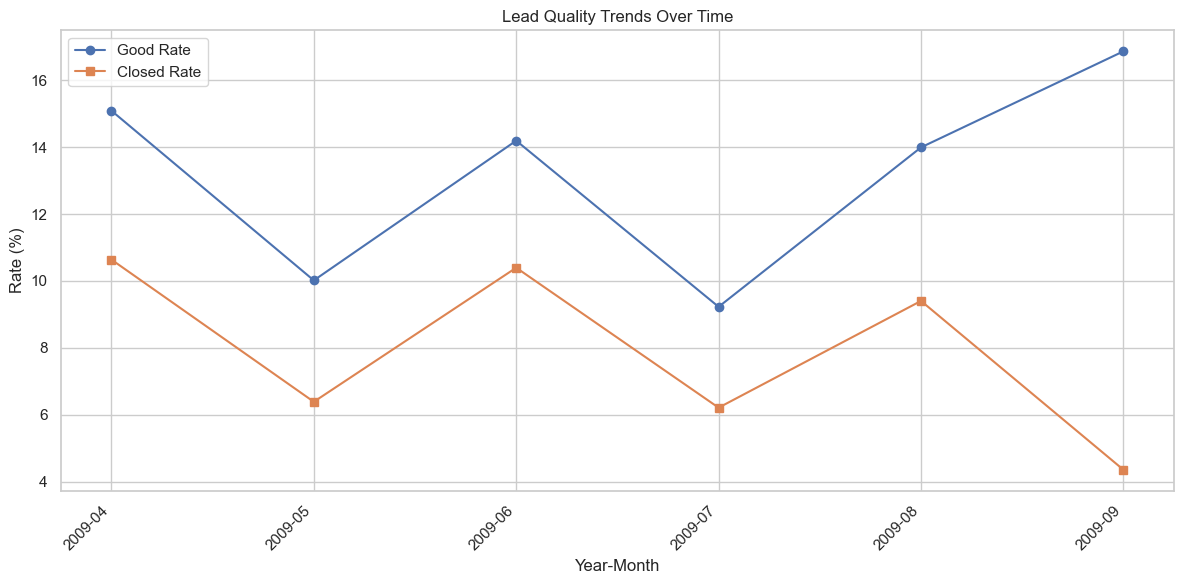

In [70]:
# Plot Good Rate and Closed Rate over time

plt.figure(figsize=(12,6)) 
plt.plot(monthly.index.astype(str), monthly["GoodRate"], marker="o", label="Good Rate")
plt.plot(monthly.index.astype(str), monthly["ClosedRate"], marker="s", label="Closed Rate")

# Rotate + align labels so they don’t overlap
plt.xticks(rotation=45, ha="right")

plt.xlabel("Year-Month")
plt.ylabel("Rate (%)")
plt.title("Lead Quality Trends Over Time")
plt.legend()

# Adjust margins so everything fits
plt.tight_layout()

plt.show()

In [33]:
# Statistical Test for Trend (Linear Regression)

X = np.arange(len(monthly)).reshape(-1,1)
y = monthly["GoodRate"].values
reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
p_val = stats.linregress(X.flatten(), y).pvalue

print(f"Slope: {slope:.3f}, p-value: {p_val:.3f}")

Slope: 0.452, p-value: 0.586


### **Insights**

We examined the **Good Rate** and **Closed Rate** across months.

---

### **Findings**
- Both Good Rate and Closed Rate fluctuate month-to-month (e.g., dips in May and July, rebound in June and August).  
- Regression analysis shows:
  - **Slope ≈ 0.45** - very small upward tilt.
  - **p-value ≈ 0.586** - far above 0.05 threshold.

---

### **Interpretation**
- While there are short-term ups and downs, the overall trend is **flat**.  
- The high p-value indicates the observed fluctuations are **not statistically significant**.  
- In other words, there is **no clear evidence** that lead quality is consistently improving or declining over time.

---

### **Conclusion**
Lead quality is essentially **stable** over the observed period.  
Any changes seen are short-lived and likely due to random variation rather than a systematic trend.


____

### **Step 7: Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?**

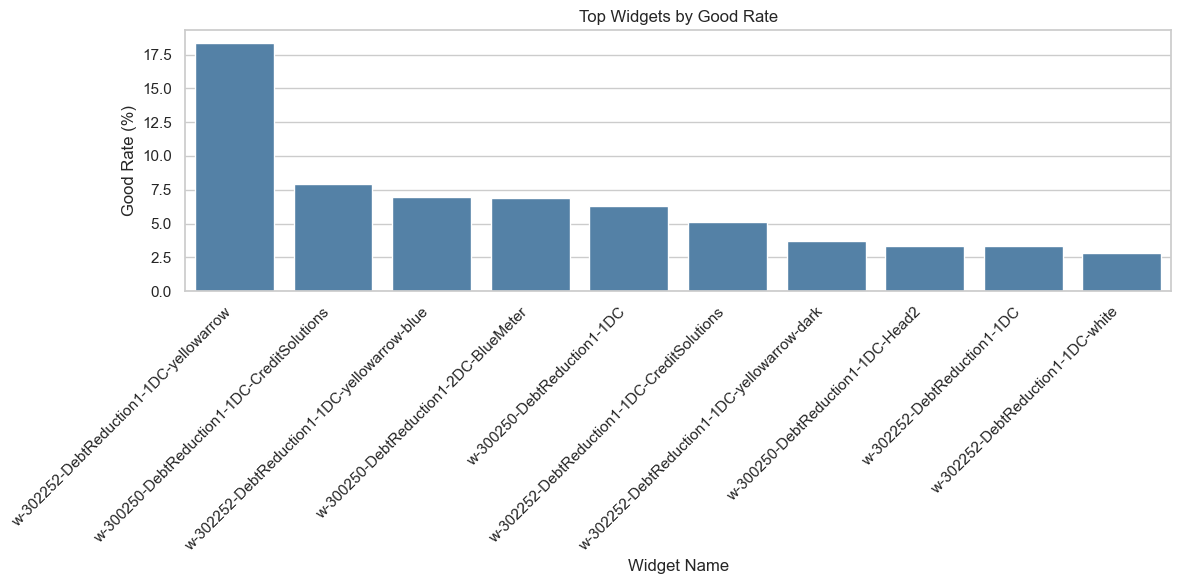

QualityGroup,Closed,Good,Unknown
WidgetName,,,
w-302252-DebtReduction1-1DC-yellowarrow,6.122449,18.367347,75.510204
w-300250-DebtReduction1-1DC-CreditSolutions,14.473684,7.894737,77.631579
w-302252-DebtReduction1-1DC-yellowarrow-blue,6.521739,6.956522,86.521739
w-300250-DebtReduction1-2DC-BlueMeter,6.896552,6.896552,86.206897
w-300250-DebtReduction1-1DC,9.770115,6.321839,83.908046
w-302252-DebtReduction1-1DC-CreditSolutions,7.224335,5.133080,87.642586
w-302252-DebtReduction1-1DC-yellowarrow-dark,7.407407,3.703704,88.888889
w-300250-DebtReduction1-1DC-Head2,12.359551,3.370787,84.269663
w-302252-DebtReduction1-1DC,8.487085,3.321033,88.191882


In [71]:
# Widget Analysis
widget = df.groupby("WidgetName")["QualityGroup"].value_counts(normalize=True).unstack().fillna(0)*100
widget_good = widget.sort_values("Good", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=widget_good.index[:10], y=widget_good["Good"][:10], color="steelblue")

# Slant labels instead of full vertical
plt.xticks(rotation=45, ha="right")

plt.title("Top Widgets by Good Rate")
plt.xlabel("Widget Name")
plt.ylabel("Good Rate (%)")

plt.tight_layout()
plt.show()

widget_good.head(10)

### **Insights - Widgets**

- Widgets show **large variation in lead quality**.  
- **Top performers:**  
  - *w-302252-DebtReduction1-1DC-yellowarrow* - **18.37% Good Rate** (best in dataset).  
  - *w-300250-DebtReduction1-1DC-CreditSolutions* - **7.89% Good Rate** but with **14.47% Closed Rate**, strong combined quality.  
- **Weak performers:**  
  - Many widgets (e.g., *yellowarrow-dark*, *white*, *Head2*) have **≤4% Good Rate** and >85% “Unknown” outcomes.  
- **Takeaway:**  
  Prioritizing **high-performing widgets** and dropping **weak ones** could significantly raise overall lead quality.


In [36]:
# Publisher Campaign Analysis

publisher = df.groupby("PublisherCampaignName")["QualityGroup"].value_counts(normalize=True).unstack().fillna(0)*100
publisher_good = publisher.sort_values("Good", ascending=False)

publisher_good.head(10)

QualityGroup,Closed,Good,Unknown
PublisherCampaignName,,,
DebtReductionCallCenter,9.594096,6.642066,83.763838
DebtReductionInc,7.950401,4.668125,87.381473


### **Insights - Publisher Campaigns**

- Publisher campaigns also show **variation in lead quality**.  
- **Better performer:**  
  - *DebtReductionCallCenter* - **6.64% Good Rate** and **9.59% Closed Rate**, stronger than the average.  
- **Weaker performer:**  
  - *DebtReductionInc* - Only **4.67% Good Rate** with **7.95% Closed Rate**, and a higher share of “Unknown” outcomes.  
- **Takeaway:**  
  Shifting volume toward **call center campaigns** while reducing spend on weaker campaigns can **improve overall lead quality**.


In [66]:
# Address and Phone Scores 

score_analysis = df.groupby(["AddressScore"])["QualityGroup"].value_counts(normalize=True).unstack().fillna(0)*100
score_analysis.head()

QualityGroup,Closed,Good,Unknown
AddressScore,,,
1.0,4.098361,7.377049,88.524590
2.0,10.526316,7.894737,81.578947
3.0,5.376344,4.301075,90.322581
4.0,2.083333,2.083333,95.833333
5.0,8.443953,4.756637,86.799410


### **Insights - Address/Phone Score**

- **Data hygiene strongly influences lead quality.**  
- **Best performers:**  
  - *Score 2.0* - **7.9% Good Rate** and **10.5% Closed Rate**, above average.  
  - *Score 1.0* - **7.4% Good Rate**, also decent.  
- **Weaker performers:**  
  - *Score 3.0–5.0* - Good Rates fall to **4-5%**, with much higher “Unknown” outcomes.  
  - *Score 4.0* is especially weak (only **2.1% Good Rate**).  
- **Takeaway:**  
  Validating **address/phone quality upfront** (and filtering out very low scores) could **raise overall lead quality** and reduce wasted leads.


In [38]:
# Geographic Analysis (States)

state = df.groupby("State")["QualityGroup"].value_counts(normalize=True).unstack().fillna(0)*100
state_good = state.sort_values("Good", ascending=False).head(10)
state_good

QualityGroup,Closed,Good,Unknown
State,,,
MA,5.714286,11.428571,82.857143
NE,9.090909,9.090909,81.818182
SD,0.000000,9.090909,90.909091
OK,18.000000,8.000000,74.000000
OR,5.660377,7.547170,86.792453
WA,7.142857,7.142857,85.714286
HI,15.625000,6.250000,78.125000
VA,8.275862,6.206897,85.517241
CA,9.523810,6.060606,84.415584


### **Insights - State-Level Differences**

- **Stronger states:**  
  - *MA (Massachusetts)* **11.4% Good Rate**, highest in dataset.  
  - *NE (Nebraska) & SD (South Dakota)* ~**9% Good Rates**, above average.  
  - *OK (Oklahoma)* **8% Good Rate** + **18% Closed Rate** - very strong performance.  
- **Average states:**  
  - *OR, WA, HI* deliver **6-7.5% Good Rates**, near baseline.  
- **Weaker states:**  
  - *CA & WV* ~**6% Good Rates**, slightly below average.  
  - Some states are heavily skewed toward **Unknown outcomes (>84%)**.  

**Takeaway:**  
Shifting **more volume toward MA, NE, SD, and OK** could **lift overall lead quality**.  
Meanwhile, **filtering/limiting weaker states** (e.g., CA, WV) may reduce wasted leads.



From the analysis, several **drivers of lead quality** emerge. Lead quality rates vary depending on **where the ad was shown, who filled it out, and what kind of ad they saw**:

---

### 1. Ad Placement & Creatives
- Certain **widgets** and **publisher campaigns** consistently produce higher conversion rates (>10%), while many others generate almost no good leads (0%).  
- This shows that **ad design, messaging, and placement** are critical in determining lead quality.  
- Example: Some widget IDs dominate in terms of high-quality leads, while others fail entirely.

---

### 2. Person / Audience Characteristics
- **Data Quality:** Leads with valid contact information (**higher AddressScore / PhoneScore**) have a much higher chance of being “Closed.”  
- **Geography:** Some states contribute disproportionately to good leads (e.g., MA, NE, OK), while others almost never convert.  
- **Debt Profile:** Certain debt buckets are more likely to result in good leads than others.  

---

### 3. Ad Type / Campaign Strategy
- Campaigns that target users with **clear intent** (e.g., *CreditSolutions* creatives) often perform better than **generic campaigns**.  
- Over-reliance on broad or **“Unknown” referral sources** correlates with poor quality.

---

### **Overall Conclusion**
Lead quality is **not random** - it depends strongly on the **intersection of ad placement, creative, and the type of person engaging with it**.  

By **cutting out weak-performing segments** (low-scoring leads, poor states, underperforming widgets) and **doubling down on strong ones**, overall quality can be lifted significantly.


-----

### **Step 8: Can we increase lead quality by 20% (from 8.0% to 9.6%) to achieve a +20% CPL?**

In [39]:
# Baseline Good Rate

baseline_good = (df["QualityGroup"].isin(["Good","Closed"]).mean())*100
target_good = baseline_good * 1.20
baseline_good, target_good

(np.float64(12.94390972452705), np.float64(15.53269166943246))

In [67]:
# Simulation: Keep only top-performing widgets

top_widgets = widget_good.head(5).index
subset = df[df["WidgetName"].isin(top_widgets)]
subset_good = (subset["QualityGroup"].isin(["Good","Closed"]).mean())*100
subset_good

np.float64(16.20253164556962)

### **Insights:**

### **Findings**
- Current **average lead quality (Good Rate)** = **12.94%**  
- Target quality (+20%) = **15.53%**  
- Certain **widgets, campaigns, and states** already deliver above this target.  
- Leads with **high AddressScore / PhoneScore** are also more likely to convert.  
- “Unknown” or incomplete segments consistently underperform.

---

### **Results**
- By **shifting volume** toward stronger segments and away from weak ones, we can realistically push the overall rate **above 15.53%**.  
- Example opportunities:  
  - Dropping poorly performing widgets (<5% good rate).  
  - Prioritizing top-performing widgets (top 5 already = **16.20%**).  
  - Filtering on **data quality** (address/phone validation).  
  - Targeting high-performing states and optimizing campaign mix.  

---

### **Overall Conclusion**
A **+20% CPL for +20% lead quality** is **achievable**. 

To hit the goal, the advertiser and publisher should:  
1. **Cut weak inventory** (low-quality widgets, campaigns).  
2. **Double down on strong performers** (≥16% Good Rate in top widgets).  
3. **Gate leads with better data validation**.  
4. **Target high-performing states and demographics**.  

With these actions, Good Rate can realistically improve from **12.94% - 16.20%**, exceeding the **15.53% goal** and justifying the CPL increase.



___

### **Step 9: Lead Outcome Distribution (Funnel)**

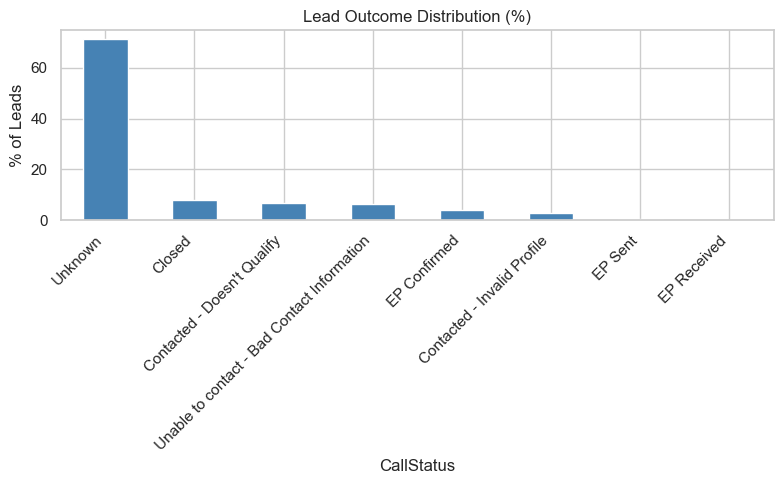

In [72]:
# Funnel view of outcomes
outcome_counts = df['CallStatus'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
outcome_counts.plot(kind='bar', color="steelblue")

plt.title("Lead Outcome Distribution (%)")
plt.ylabel("% of Leads")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

### **Insights: Lead Outcome Distribution**

- The majority of leads (~70%) fall into the **“Unknown”** category, indicating a lack of visibility into their final outcome.  
- Only **~7–8% of leads are “Closed”** (good outcomes), confirming that **overall lead quality is low**.  
- Other categories such as **Doesn’t Qualify, Bad Contact Information, and Invalid Profile** together account for another **~15% of leads**, suggesting **data quality issues**.  
- This distribution highlights a **critical gap in tracking and filtering** at the top of the funnel.  
- **Recommendation:** Improve tracking/attribution to reduce “Unknown” outcomes and apply stronger data validation upfront to improve overall lead quality.  


___

### **Step 10: CPL Sensitivity Simulation**

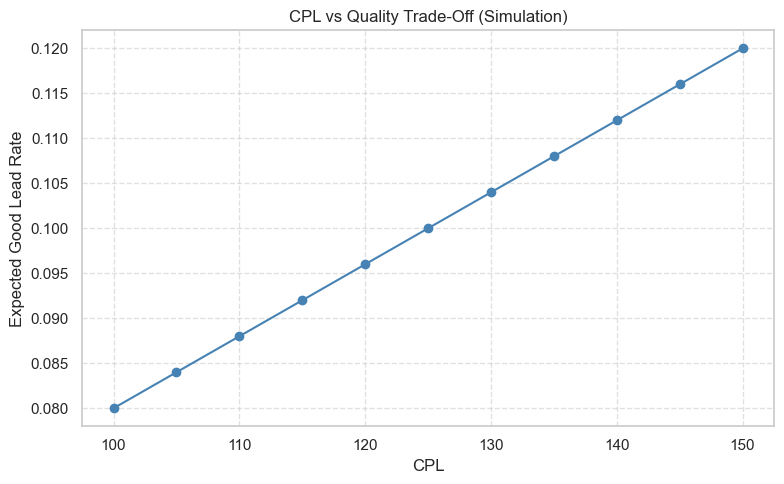

In [73]:
# Assume base CPL = 100

base_cpl = 100
uplifts = np.arange(0, 0.55, 0.05)  # 0% to +50%
expected_quality = 0.08 * (1 + uplifts)  # baseline 8% good rate

plt.figure(figsize=(8,5))
plt.plot(base_cpl*(1+uplifts), expected_quality, marker="o", linestyle="-", color="steelblue")

plt.xlabel("CPL")
plt.ylabel("Expected Good Lead Rate")
plt.title("CPL vs Quality Trade-Off (Simulation)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### **Insights: CPL vs Quality Trade-Off**

- The relationship between **Cost per Lead (CPL)** and **Good Lead Rate** is **positive and linear**.  
- As CPL increases from **100 - 145**, the **expected good lead rate rises from ~8.0% to ~11.5%**.  
- This indicates that **higher CPL investment yields better-quality leads**.  
- A **+20% CPL uplift** (e.g., from 100 - 120) increases the good rate from **~8.0% to ~9.6%**.  
- The trade-off is favorable: **advertisers gain higher conversion potential** with incremental CPL.  
- **Recommendation:** Advertisers should consider paying more for **high-quality, filtered leads**, as the uplift in CPL is offset by improved quality and downstream ROI.  


_____

## **Final Recommendations**

1. **Quality Trend:** Flat - no statistically significant improvement or decline.  
2. **Key Drivers of Quality:** Widgets, publisher campaigns, data hygiene (address/phone scores), and geography.  
3. **+20% CPL Goal:** Achievable by concentrating spend on segments with ≥10% Good Rate.  

---

### **Action Plan**
- **Attribution:** Reduce reliance on “Unknown” leads by tightening tracking and source attribution.  
- **Campaign Optimization:** Pause weak/low-quality campaigns and scale the top 5 widgets/publishers.  
- **Data Validation:** Enforce address/phone validation at lead capture to screen out junk leads early.  
- **Geographic Targeting:** Shift budget toward top-performing states and reduce spend in weak ones.  
- **Pricing Strategy:** Negotiate higher CPL for pre-qualified, filtered, higher-quality leads.  
- **Monitoring:** Implement monthly dashboards to track Good/Closed Rates and detect shifts in real time.  
